In [75]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [76]:
path = "test.jpg"
image = np.array(Image.open(path))

In [77]:
avg_kernels = [np.ones((3, 3)), np.ones((5, 5)), np.ones((7, 7)), np.ones((13, 13))]

In [78]:
def convolution (image, kernel):
    output = np.zeros((image.shape))
    step = math.floor(kernel.shape[0]/2)
    for k in range(output.shape[2]):
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                
                i_start, i_stop = i-step, i+step+1
                j_start, j_stop = j-step, j+step+1

                if i_start >= 0 and j_start>=0 and i_stop < image.shape[0] and j_stop < image.shape[1]:
                    multipication = np.multiply(image[i_start:i_stop, j_start:j_stop, k], kernel) 
                    output[i, j, k] = np.sum(multipication)/(kernel.shape[0]**2)
                else:
                    output[i, j, k] = image[i,j,k]
    return output

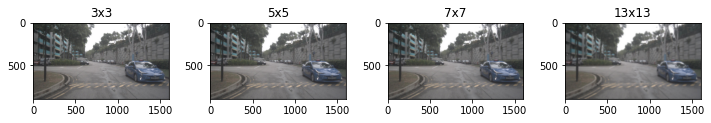

In [80]:
outputs = []
titles = ["3x3", "5x5", "7x7", "13x13"]

for kernel in avg_kernels:
    outputs.append(Image.fromarray((convolution(image, kernel)).astype(np.uint8)))
    
fig, axes = plt.subplots(1, 4, figsize=(10, 10))



for j in range(4):


    axes[j].imshow(outputs[j])
    axes[j].set_title(titles[j])

# Adjust the layout
plt.tight_layout()
# Show the figure
plt.show()

# plt.imshow(Image.fromarray((output).astype(np.uint8)))

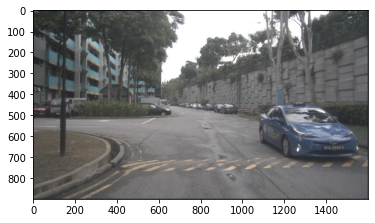

In [81]:
plt.imshow(image)

In [83]:
for i in outputs:
    i.save("convs/"+ titles[i] + ".png")

TypeError: list indices must be integers or slices, not Image